<a href="https://colab.research.google.com/github/KotagiriRohan/Titanic_Machine_Learning/blob/main/Titanic_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [24]:
import pandas as pd
import numpy as np
train_path = "/content/Dataset/titanic_train.csv"
df = pd.read_csv(train_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#removing irrelavent columns and columns with high null values.
X = df.drop(["Name","Ticket","Cabin"],axis=1)
y= X.pop("Survived")
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
#converting catagorical variables
for col in X.select_dtypes(['object']):
  X[col], _ = X[col].factorize()
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [30]:
#splitting the data set into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=0)
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,106,3,0,28.0,0,0,7.8958,0
68,69,3,1,17.0,4,2,7.9250,0
253,254,3,0,30.0,1,0,16.1000,0
320,321,3,0,22.0,0,0,7.2500,0
706,707,2,1,45.0,0,0,13.5000,0


In [46]:
y_train.head()

105    0
68     1
253    0
320    0
706    1
Name: Survived, dtype: int64

In [57]:
from sklearn.impute import SimpleImputer
#replacing null values from the data set wiht the most frequent number
my_imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
X_impu_train = pd.DataFrame(my_imputer.fit_transform(X_train))
X_impu_train.columns = X_train.columns
X_impu_train.index = X_train.index
X_impu_valid = pd.DataFrame(my_imputer.transform(X_valid))
X_impu_valid.columns = X_valid.columns
X_impu_valid.index = X_valid.index
X_impu_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,106.0,3.0,0.0,28.0,0.0,0.0,7.8958,0.0
68,69.0,3.0,1.0,17.0,4.0,2.0,7.9250,0.0
253,254.0,3.0,0.0,30.0,1.0,0.0,16.1000,0.0
320,321.0,3.0,0.0,22.0,0.0,0.0,7.2500,0.0
706,707.0,2.0,1.0,45.0,0.0,0.0,13.5000,0.0


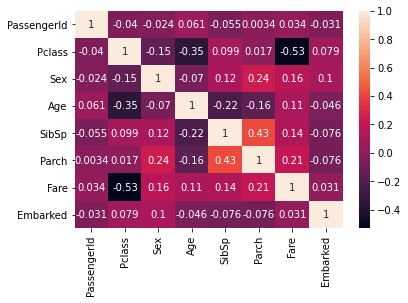

In [56]:
# now checking the relationship between the survived and the fair they paid and their Pclass

import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

sns.heatmap(data = X_impu_train.corr(),annot= True)

# from the graph we can see that higher class female had higher chance of survival

In [76]:
# using Logistic Regression to determine the outcome
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

classifier.fit(X_impu_train,y_train)
y_pred = classifier.predict(X_impu_valid)

In [77]:
from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_valid,y_pred) 
mean

0.14349775784753363